In [1]:
!git clone https://github.com/CrookedNoob/Mask_RCNN-Multi-Class-Detection

Cloning into 'Mask_RCNN-Multi-Class-Detection'...
remote: Enumerating objects: 908, done.
remote: Total 908 (delta 0), reused 0 (delta 0), pack-reused 908
Receiving objects: 100% (908/908), 117.81 MiB | 26.64 MiB/s, done.
Resolving deltas: 100% (474/474), done.


In [1]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!pip install --upgrade keras==2.1.0

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Keras-2.1.0-py2.py3-none-any.whl (302 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [6]:
import sys
sys.path.append("/content/Mask_RCNN-Multi-Class-Detection")
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from mrcnn import visualize
from mrcnn import utils
import warnings
from xml.etree import ElementTree
import skimage.draw
import cv2
import imgaug

# import keras libraries
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/stock_data/images.zip

Archive:  /content/drive/MyDrive/stock_data/images.zip
   creating: images/train/
   creating: images/train/.ipynb_checkpoints/
  inflating: images/train/.ipynb_checkpoints/train-checkpoint.json  
  inflating: images/train/Screenshot 2022-05-21 at 12.18.41.png  
  inflating: images/train/Screenshot 2022-05-21 at 12.20.25.png  
  inflating: images/train/Screenshot 2022-05-21 at 12.20.34.png  
  inflating: images/train/Screenshot 2022-05-21 at 12.22.46.png  
  inflating: images/train/Screenshot 2022-05-21 at 18.50.02.png  
  inflating: images/train/Screenshot 2022-05-21 at 18.51.22.png  
  inflating: images/train/Screenshot 2022-05-21 at 18.51.53.png  
  inflating: images/train/Screenshot 2022-05-21 at 18.52.23.png  
  inflating: images/train/Screenshot 2022-05-21 at 18.52.30.png  
  inflating: images/train/Screenshot 2022-05-21 at 18.52.56.png  
  inflating: images/train/Screenshot 2022-05-21 at 18.53.00.png  
  inflating: images/train/Screenshot 2022-05-21 at 18.53.18.png  
  inflating

In [12]:
model_path = '/content/drive/MyDrive/stock_data/stock20220531T2013/mask_rcnn_stock_0015.h5'

In [13]:
img_path="/content/images/val/Screenshot 2022-05-21 at 19.02.27.png"

Re-starting from epoch 15
Processing 1 images
image                    shape: (772, 826, 3)         min:   79.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


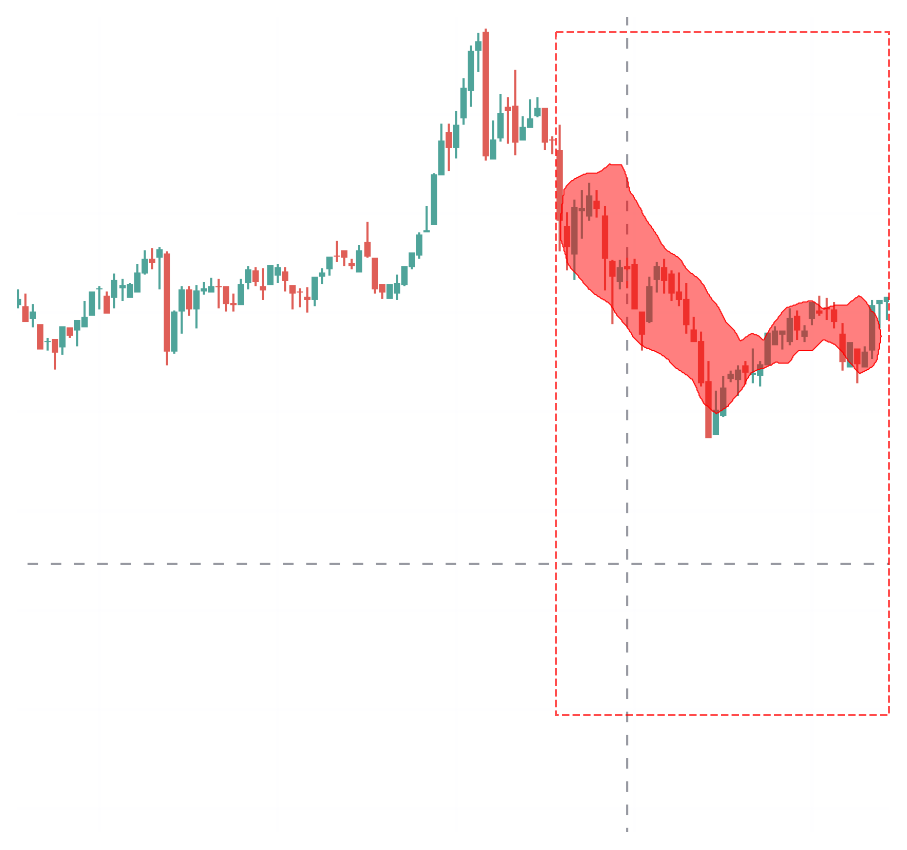

In [14]:
class PredictionConfig(Config):
    NAME = "stock"
    NUM_CLASSES = 1 + 3
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
cfg = PredictionConfig()

model = MaskRCNN(mode='inference', model_dir='./', config=cfg)

model.load_weights(model_path, by_name=True) 
image = load_img(img_path)

image = img_to_array(image)

# call the detect method on image
results = model.detect([image], verbose=1)
r = results[0]
class_names=['background','c','ihs','hs']
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names,  r['scores'])
